CAR PREDICTION

Importing important Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

Importing Data


In [2]:
path="/content/drive/MyDrive/Dataset/cardekho_dataset.csv"
df=pd.read_csv(path);


In [3]:
df.head()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [6]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15409,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


In [7]:
# Defining numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 7 numerical features : ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']

We have 6 categorical features : ['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']


Data Decritption(Feature Information)

car_name: Car's Full name, which includes brand and specific model name.\
brand: Brand Name of the particular car.\
model: Exact model name of the car of a particular brand.\
seller_type: Which Type of seller is selling the used car\
fuel_type: Fuel used in the used car, which was put up on sale.\
transmission_type: Transmission used in the used car, which was put on sale.\
vehicle_age: The count of years since car was bought.\
mileage: It is the number of kilometer the car runs per litre.\
engine: It is the engine capacity in cc(cubic centimeters)\
max_power: Max power it produces in BHP.\
seats: Total number of seats in car.\
selling_price: The sale price which was put up on website.


In [8]:
print('Missing Value Present in different columns of DataFrame are as follows : ')
print('-'*100)
total=df.isnull().sum().sort_values(ascending=False)
percent=(df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

Missing Value Present in different columns of DataFrame are as follows : 
----------------------------------------------------------------------------------------------------


,Total,Percent
car_name,0,0.0
brand,0,0.0
model,0,0.0
vehicle_age,0,0.0
km_driven,0,0.0
seller_type,0,0.0
fuel_type,0,0.0
transmission_type,0,0.0
mileage,0,0.0
engine,0,0.0


In [9]:
print('-'*125)
print('Checking records :')
print('-'*125)

print("'car_name' variable have {} unique category : \n{}\n".format(df['car_name'].nunique(), df['car_name'].unique()))
print('-'*125)

print("'brand' variable have {} unique category : \n{}\n".format(df['brand'].nunique(), df['brand'].unique()))
print('-'*125)

print("'model' variable have {} unique category : \n{}\n".format(df['model'].nunique(), df['model'].unique()))
print('-'*125)

print("'fuel_type' variable have {} unique category : \n{}\n".format(df['fuel_type'].nunique(), df['fuel_type'].unique()))
print('-'*125)

print("'transmission_type' variable have {} unique category : \n{}\n".format(df['transmission_type'].nunique(), df['transmission_type'].unique()))
print('-'*125)

-----------------------------------------------------------------------------------------------------------------------------
Checking records :
-----------------------------------------------------------------------------------------------------------------------------
'car_name' variable have 121 unique category : 
['Maruti Alto' 'Hyundai Grand' 'Hyundai i20' 'Ford Ecosport'
 'Maruti Wagon R' 'Hyundai i10' 'Hyundai Venue' 'Maruti Swift'
 'Hyundai Verna' 'Renault Duster' 'Mini Cooper' 'Maruti Ciaz'
 'Mercedes-Benz C-Class' 'Toyota Innova' 'Maruti Baleno'
 'Maruti Swift Dzire' 'Volkswagen Vento' 'Hyundai Creta' 'Honda City'
 'Mahindra Bolero' 'Toyota Fortuner' 'Renault KWID' 'Honda Amaze'
 'Hyundai Santro' 'Mahindra XUV500' 'Mahindra KUV100' 'Maruti Ignis'
 'Datsun RediGO' 'Mahindra Scorpio' 'Mahindra Marazzo' 'Ford Aspire'
 'Ford Figo' 'Maruti Vitara' 'Tata Tiago' 'Volkswagen Polo' 'Kia Seltos'
 'Maruti Celerio' 'Datsun GO' 'BMW 5' 'Honda CR-V' 'Ford Endeavour'
 'Mahindra KUV' 'Honda 

EDA (EXPLORATORY DATA ANALYSIS)


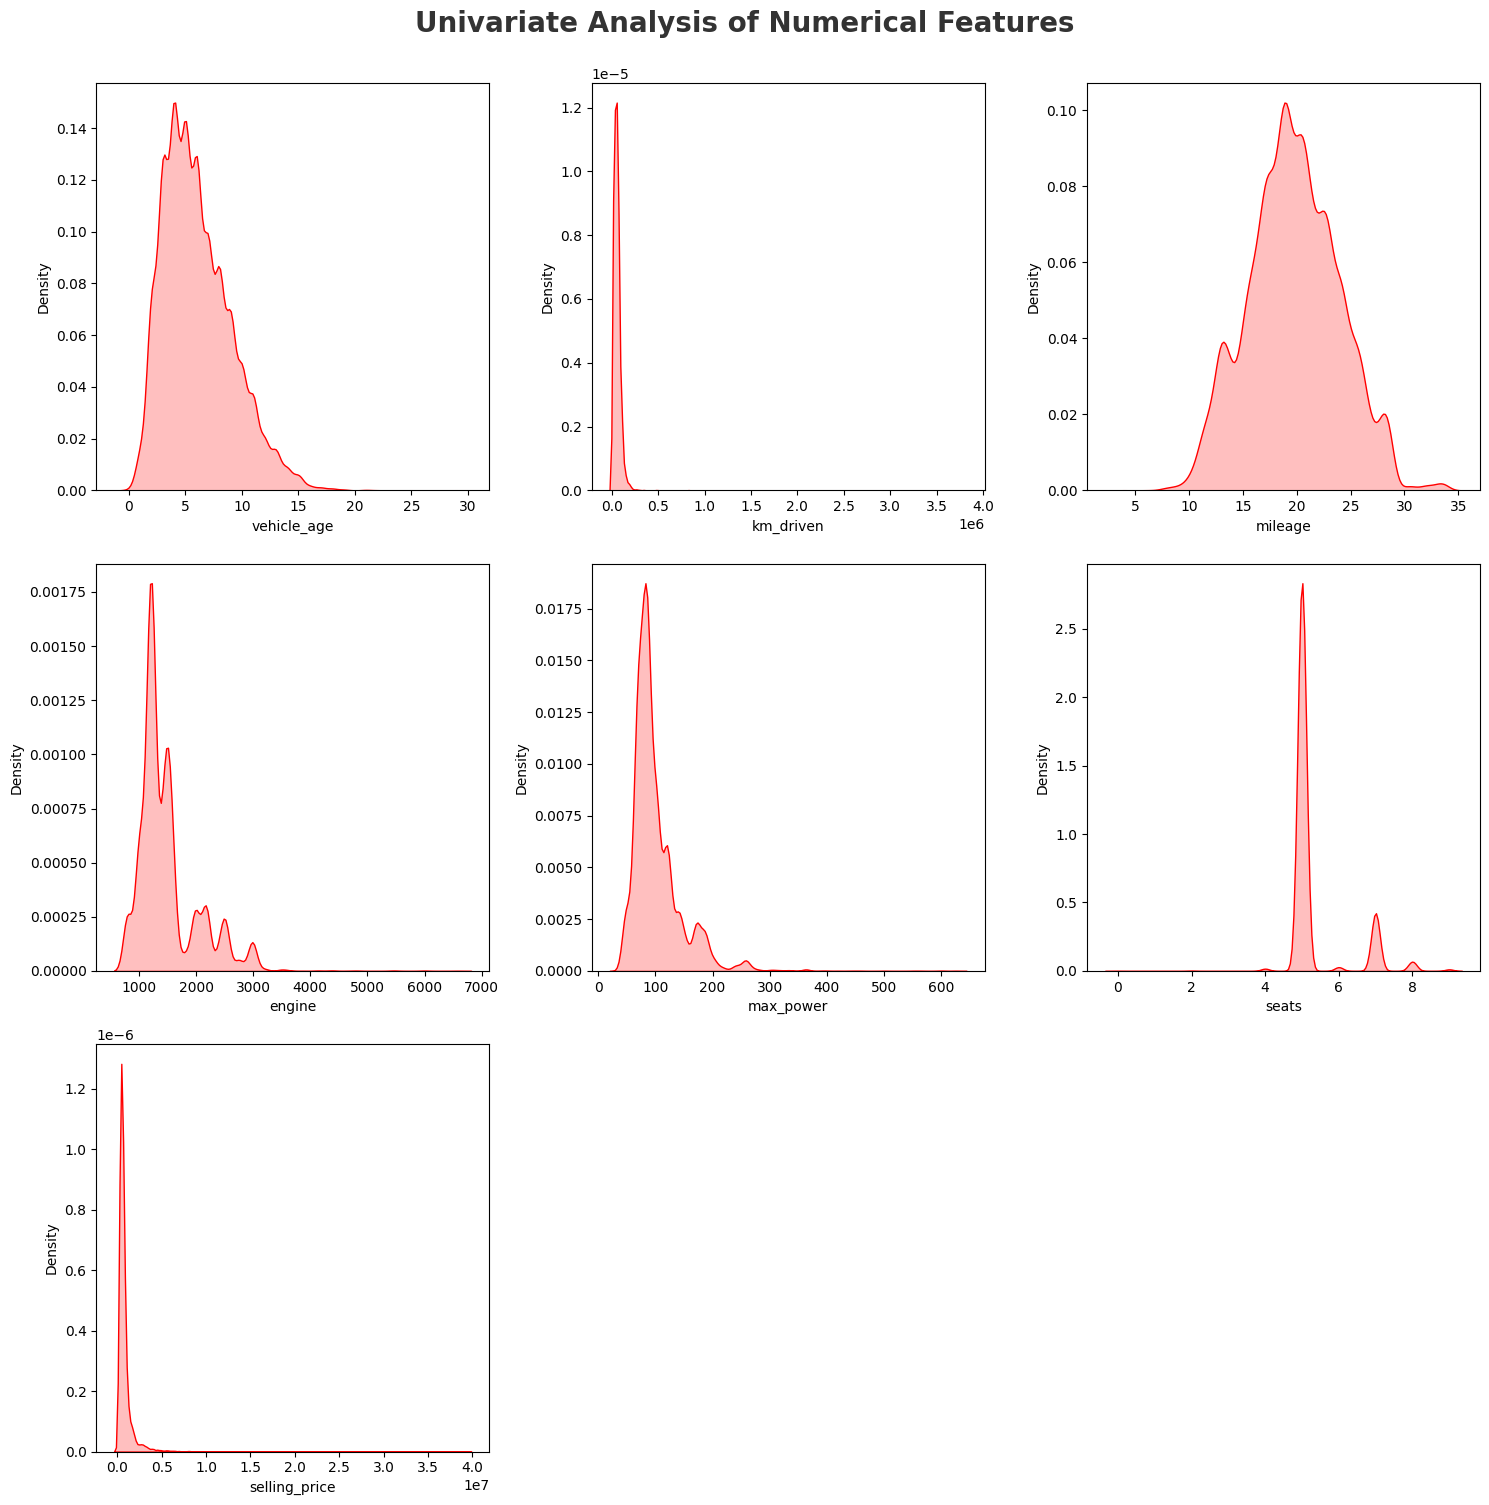

In [10]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.0)

for i in range(0, len(numeric_features)):
    plt.subplot(3, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]],fill=True, color='red')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()


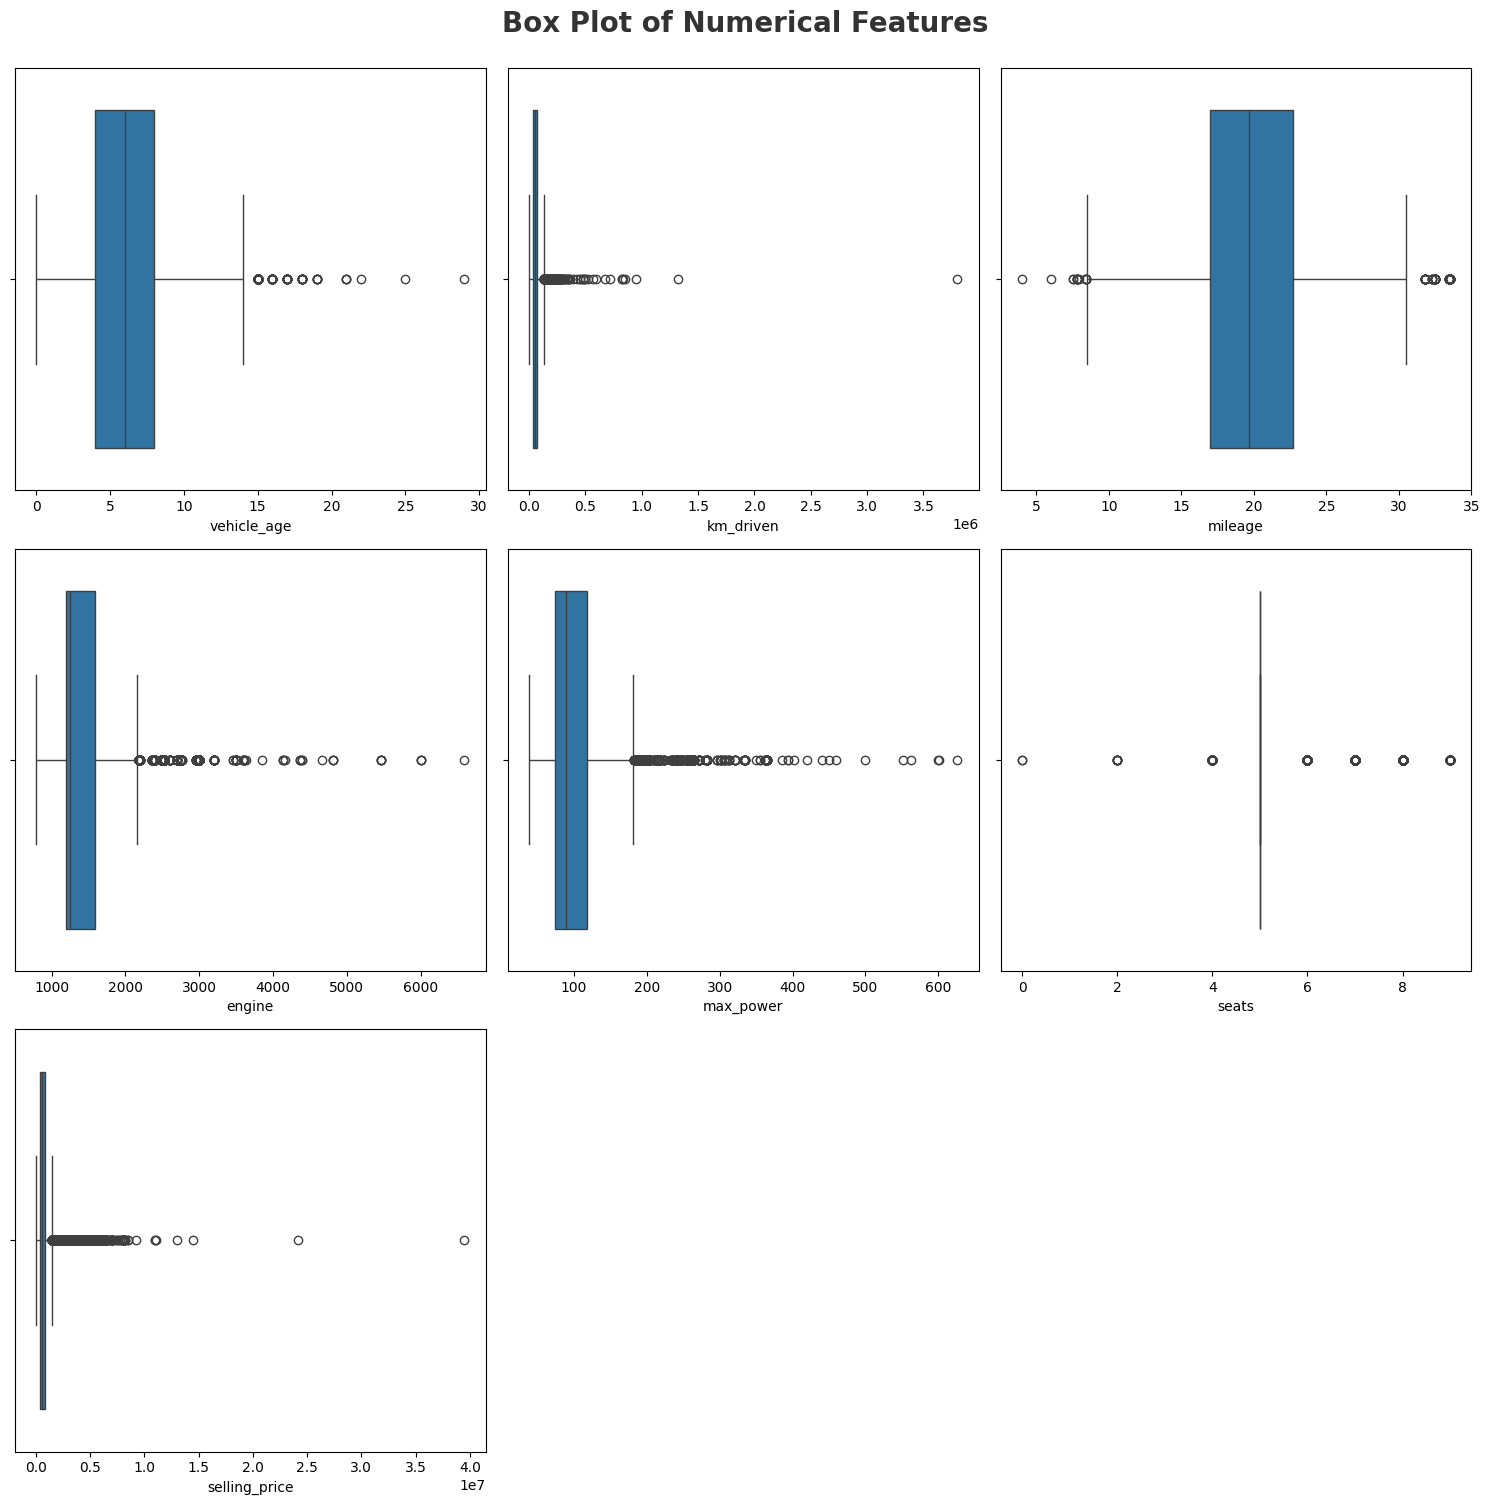

In [11]:
plt.figure(figsize=(15, 15))
plt.suptitle('Box Plot of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.0)

for i in range(0, len(numeric_features)):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df[numeric_features[i]])
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

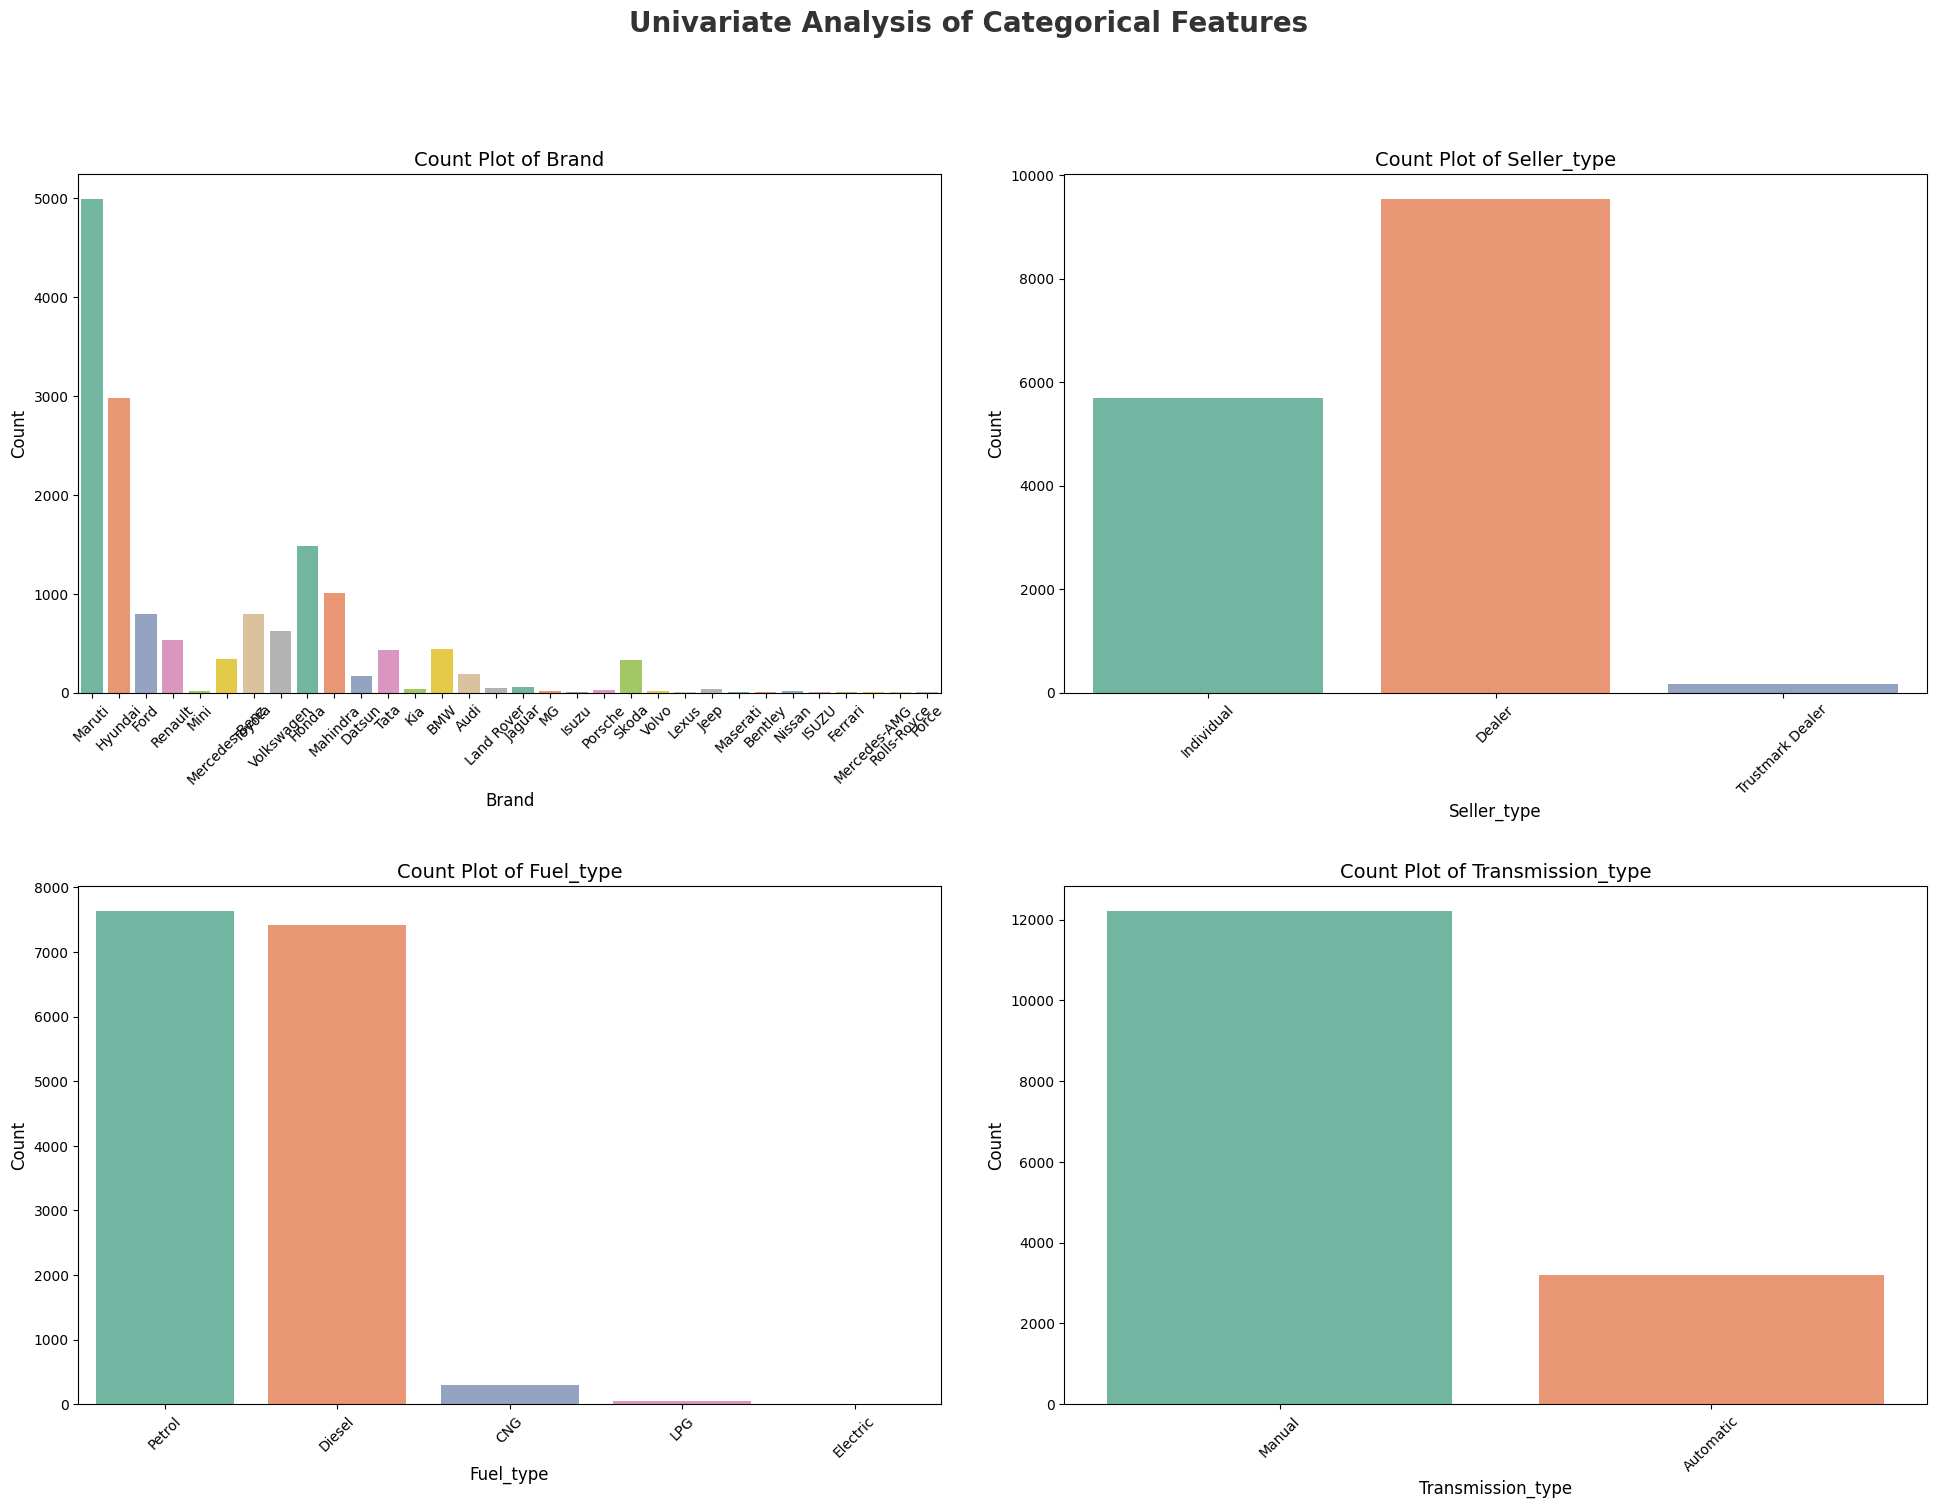

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.02)

cat1 = ['brand', 'seller_type', 'fuel_type', 'transmission_type']

for i in range(len(cat1)):
    plt.subplot(2, 2, i + 1)
    sns.countplot(data=df, x=cat1[i], hue=cat1[i], palette='Set2', legend=False)
    plt.title(f'Count Plot of {cat1[i].capitalize()}', fontsize=14)
    plt.xlabel(cat1[i].capitalize(), fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout(pad=3.0)


Num of continuos features: ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'selling_price']


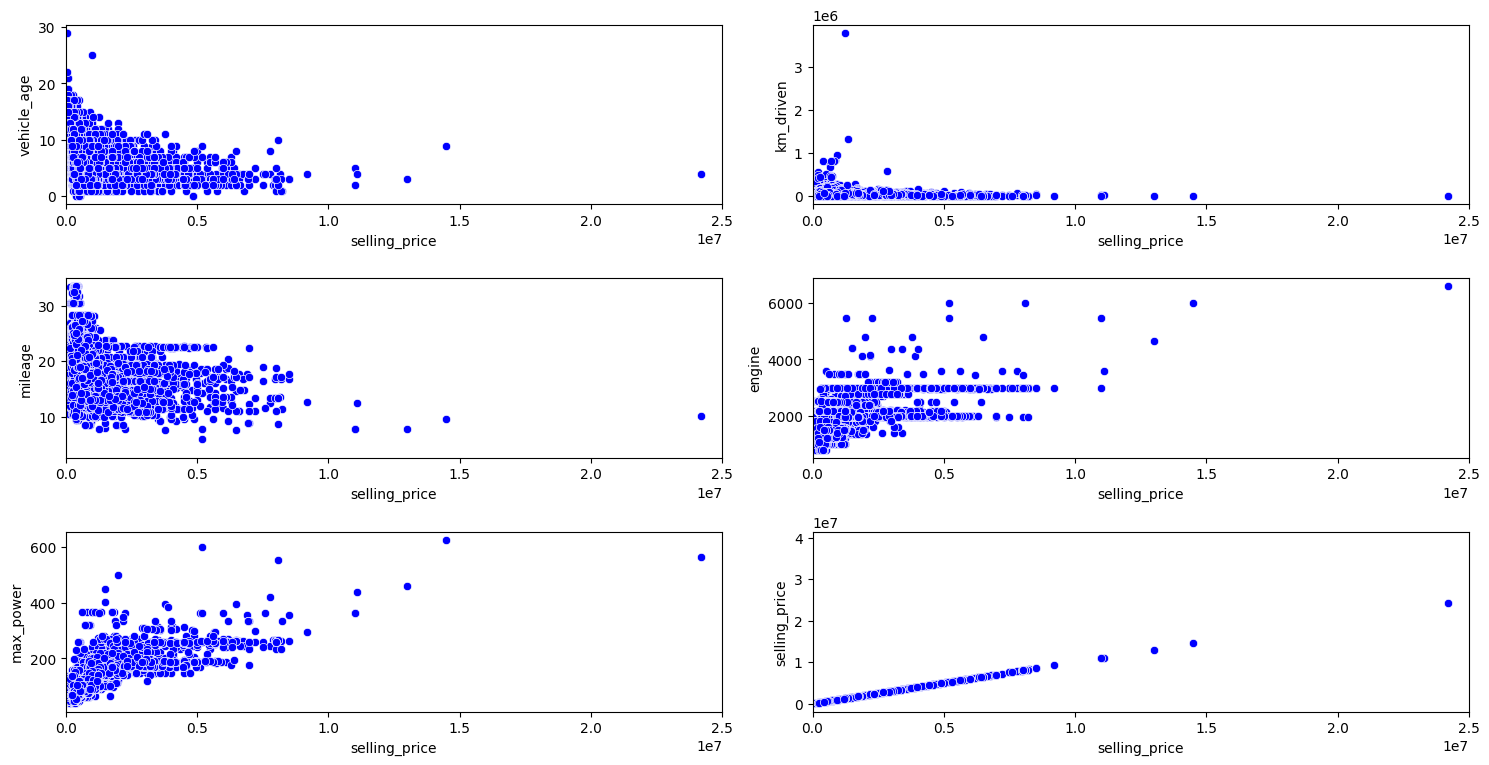

In [13]:
continuous_features=[feature for feature in numeric_features if len(df[feature].unique())>=10]
print('Num of continuos features:',continuous_features)

fig = plt.figure(figsize=(15, 20))

for i in range(0, len(continuous_features)):
    ax = plt.subplot(8, 2, i+1)

    sns.scatterplot(data= df ,x='selling_price', y=continuous_features[i], color='b')
    plt.xlim(0,25000000) # Limit to 25 lakhs Rupees to view clean
    plt.tight_layout()


#Observations
Lower Vehicle age has more selling price than Vehicle with more age.\
Engine CC has positive effect on price,Vehicle with 2000 cc and below are mostly priced below 5lakh.\
Kms Driven has negative effect on selling price.

In [14]:
df[numeric_features].corr()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
vehicle_age,1.000000,0.333891,-0.257394,0.098965,0.005208,0.030791,-0.241851
km_driven,0.333891,1.000000,-0.105239,0.192885,0.044421,0.192830,-0.080030
mileage,-0.257394,-0.105239,1.000000,-0.632987,-0.533128,-0.440280,-0.305549
engine,0.098965,0.192885,-0.632987,1.000000,0.807368,0.551236,0.585844
max_power,0.005208,0.044421,-0.533128,0.807368,1.000000,0.172257,0.750236
seats,0.030791,0.192830,-0.440280,0.551236,0.172257,1.000000,0.115033
selling_price,-0.241851,-0.080030,-0.305549,0.585844,0.750236,0.115033,1.000000


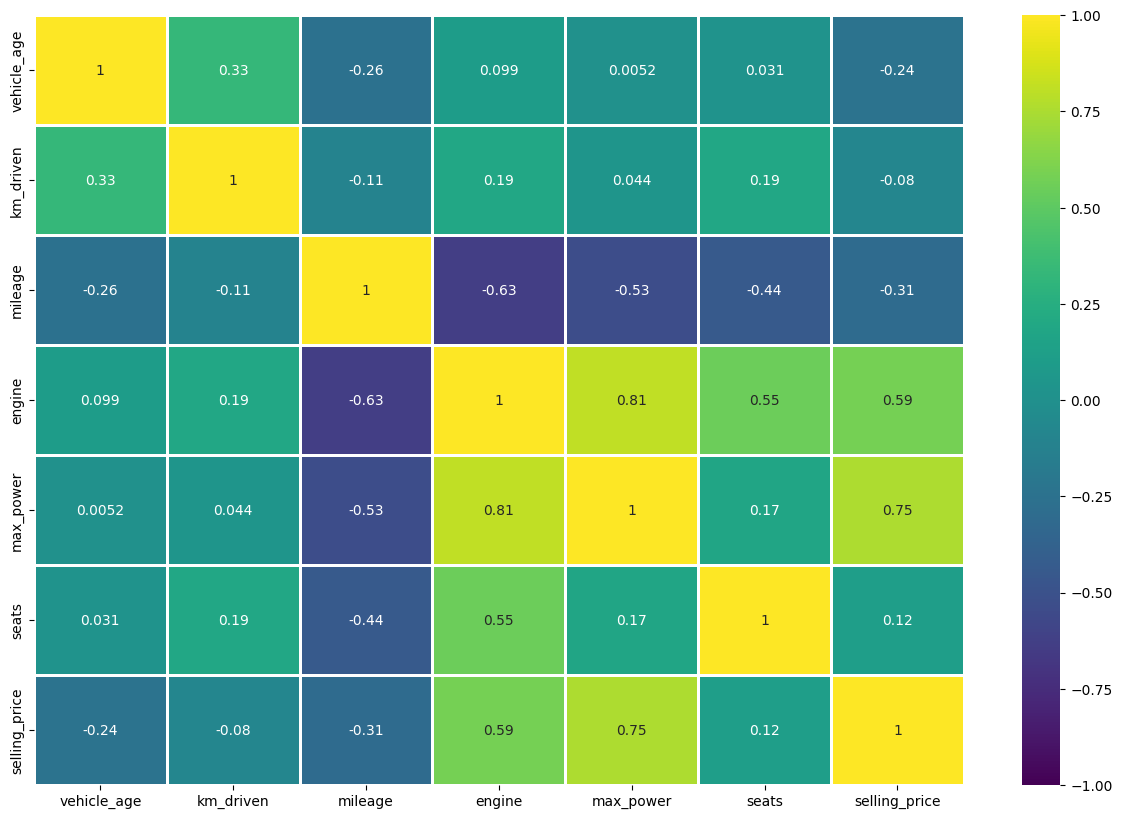

In [15]:
plt.figure(figsize=(15,10))
sns.heatmap(data = df[numeric_features].corr(), annot= True, cmap= 'viridis', vmin= -1 , vmax= 1, linecolor='white', linewidths=2)
plt.show()

#Observations

Max Power and Engine are highly correlated\
Max Power and Selling price are highly correlated.

Selling price Distribution


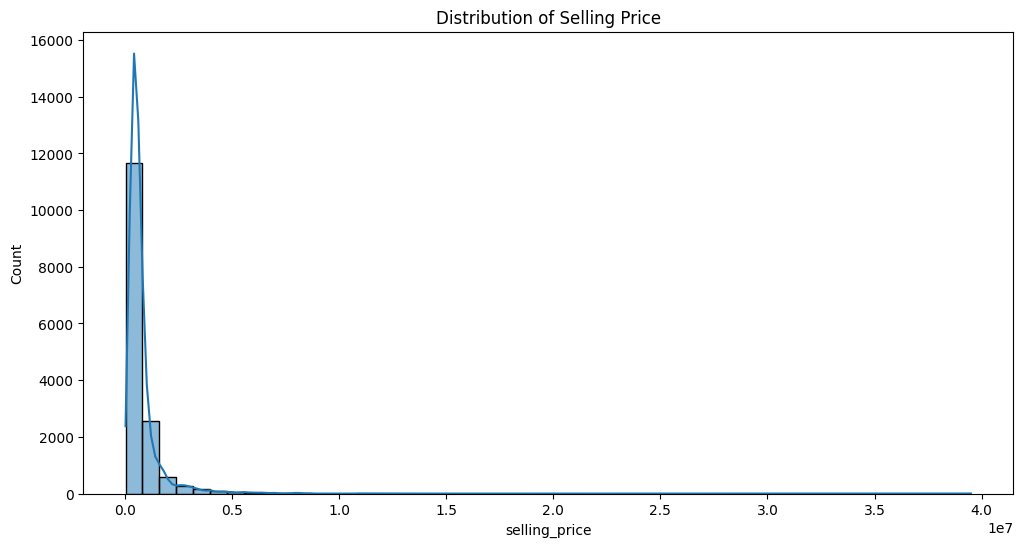

In [16]:
plt.figure(figsize=(12, 6))
sns.histplot(df['selling_price'], bins=50, kde=True)
plt.title("Distribution of Selling Price")
plt.show()

Top Car models

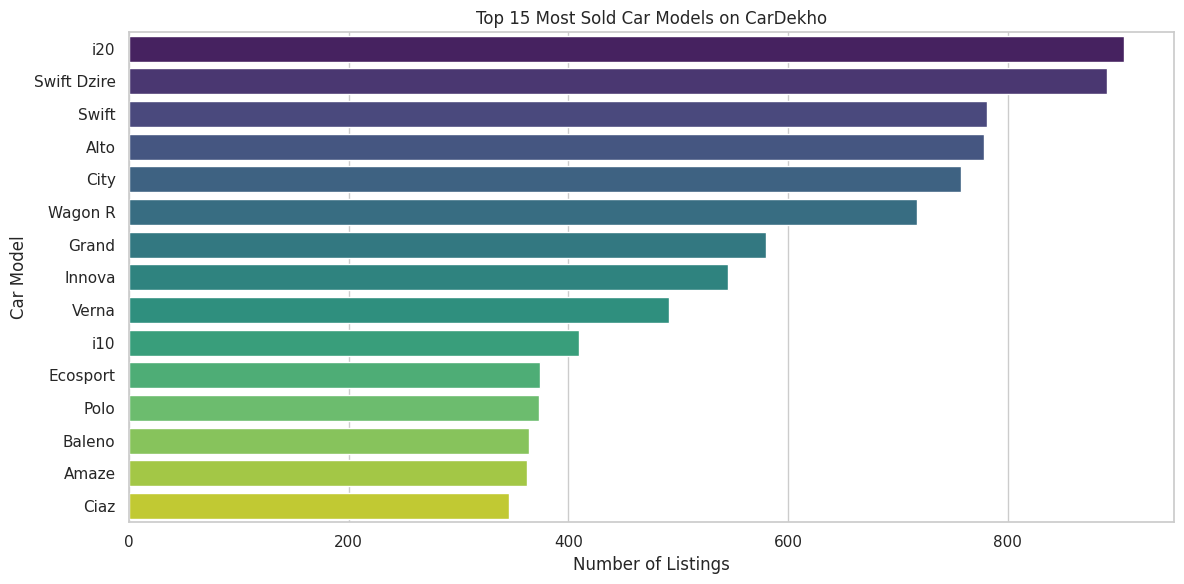

In [18]:
top_models = df['model'].value_counts().head(15)

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_models.values,
    y=top_models.index,
    hue=top_models.index,
    palette="viridis"
)
plt.xlabel("Number of Listings")
plt.ylabel("Car Model")
plt.title("Top 15 Most Sold Car Models on CarDekho")
plt.tight_layout()
plt.show()

TOP 15 CAR SELLING BRANDS

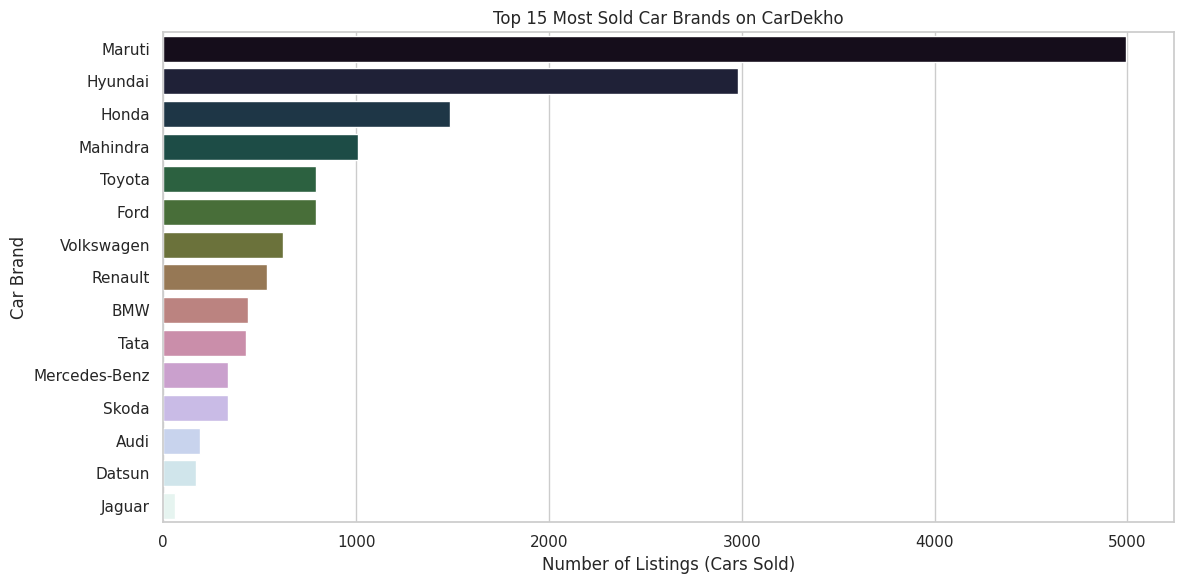

In [19]:
top_brands = df['brand'].value_counts().head(15)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_brands.values, y=top_brands.index, hue=top_brands.index,palette="cubehelix")
plt.xlabel("Number of Listings (Cars Sold)")
plt.ylabel("Car Brand")
plt.title("Top 15 Most Sold Car Brands on CarDekho")
plt.tight_layout()
plt.show()

BRAND VS MILEAGE

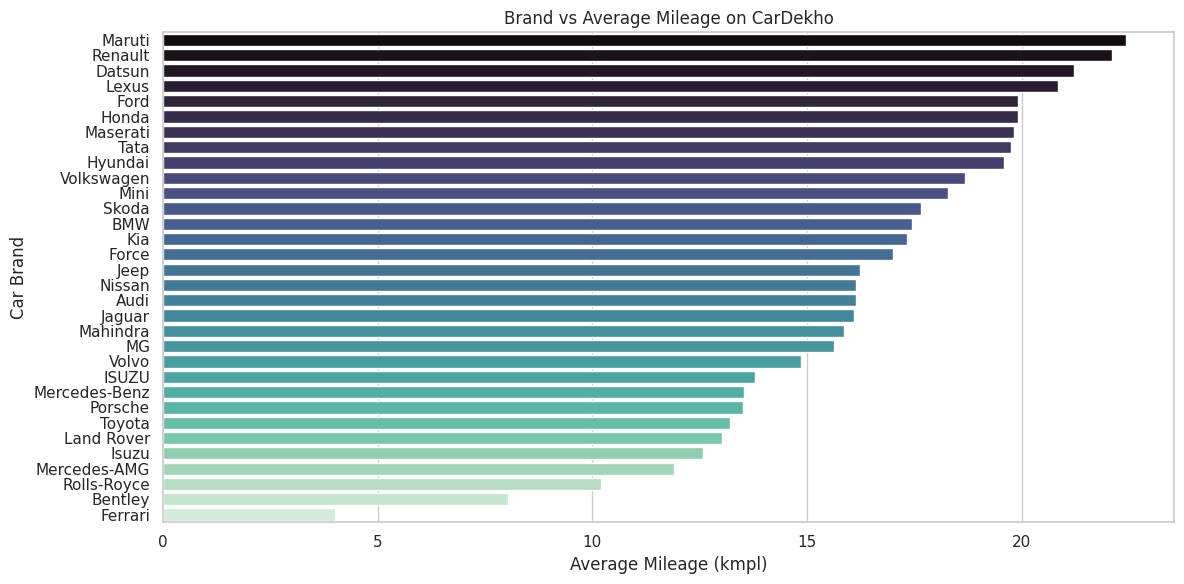

In [20]:
brand_mileage = df.groupby('brand')['mileage'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=brand_mileage.values, y=brand_mileage.index, hue= brand_mileage.index,palette="mako",legend=False)
plt.xlabel("Average Mileage (kmpl)")
plt.ylabel("Car Brand")
plt.title("Brand vs Average Mileage on CarDekho")
plt.tight_layout()
plt.show()


KILOMETERS DRIVEN  VS SELLINGPRICE

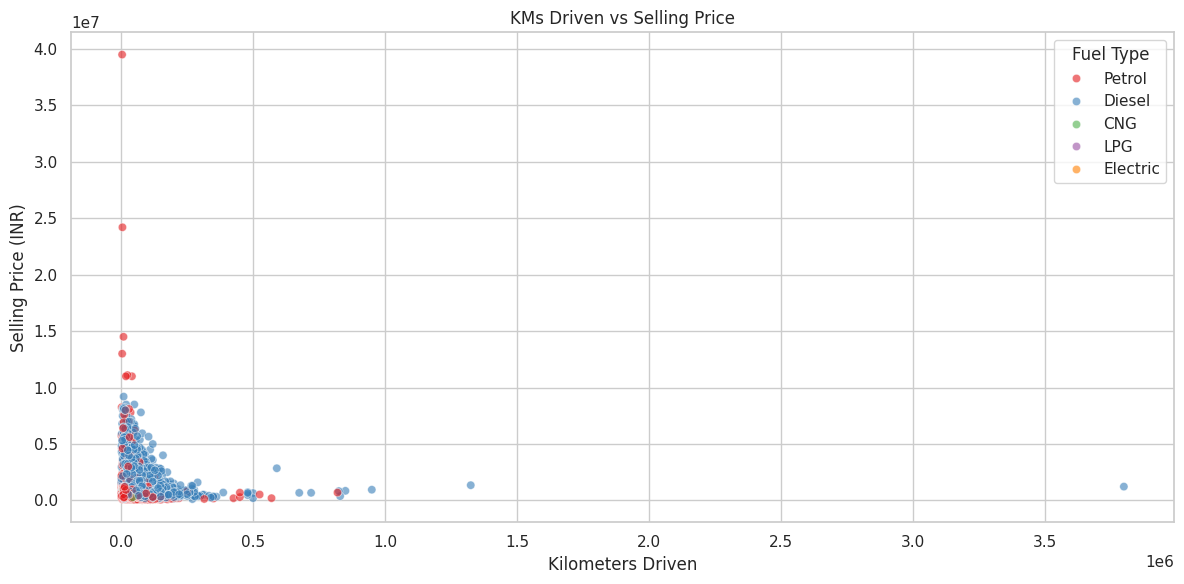

In [21]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='km_driven', y='selling_price', hue='fuel_type', alpha=0.6, palette='Set1')

plt.xlabel("Kilometers Driven")
plt.ylabel("Selling Price (INR)")
plt.title("KMs Driven vs Selling Price")
plt.legend(title='Fuel Type')
plt.tight_layout()
plt.show()

FUEL TYPE VS SELLING PRICE

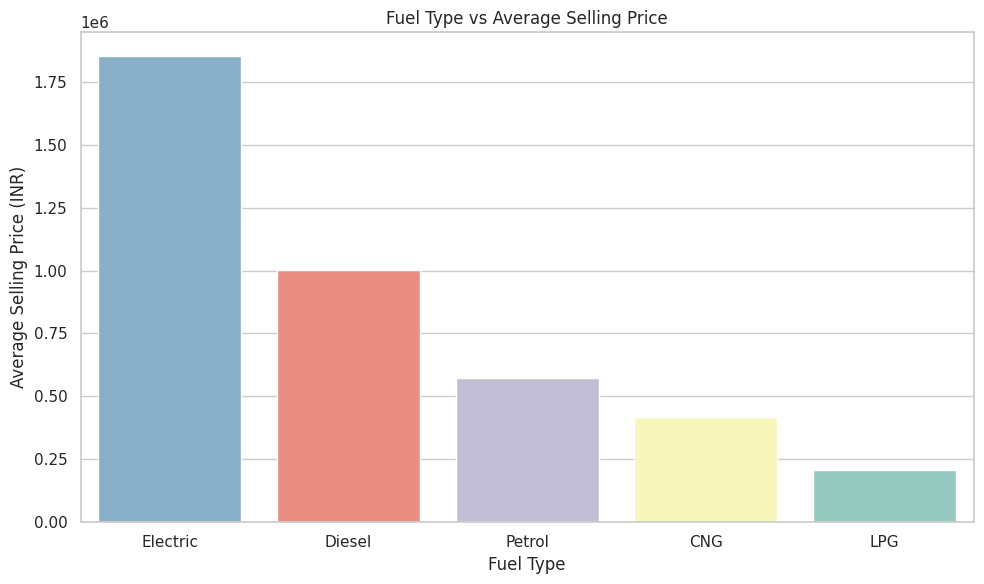

In [22]:
fuel_price = df.groupby('fuel_type')['selling_price'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=fuel_price.index, y=fuel_price.values, hue=fuel_price,palette="Set3", legend= False)
plt.ylabel("Average Selling Price (INR)")
plt.xlabel("Fuel Type")
plt.title("Fuel Type vs Average Selling Price")
plt.tight_layout()
plt.show()

VEHICLE AGE VS SELLING PRICE

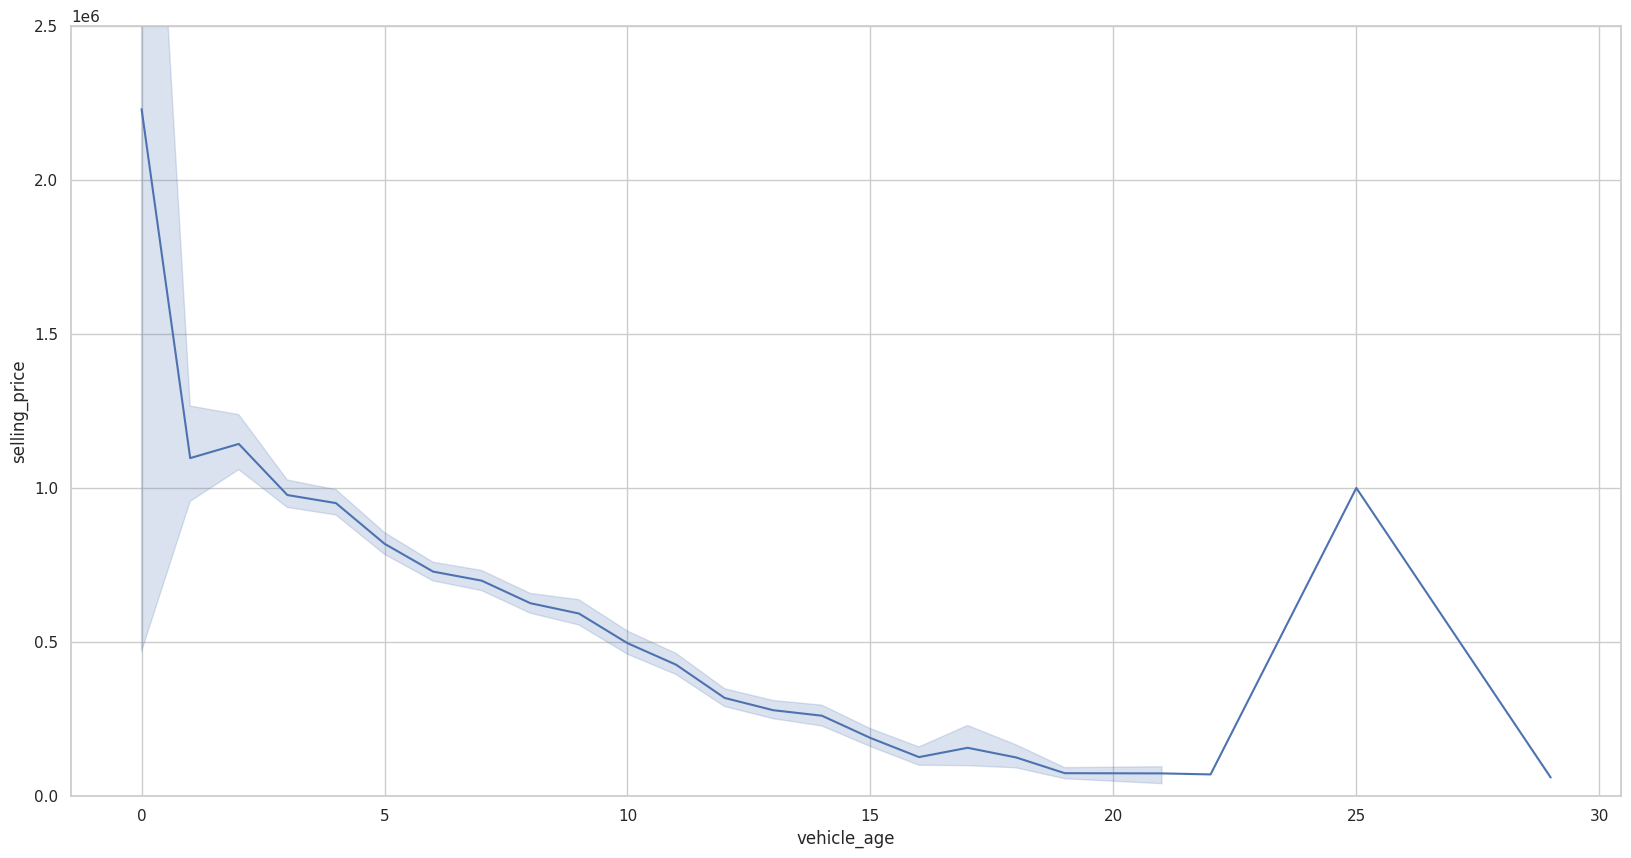

In [23]:
plt.subplots(figsize=(20,10))
sns.lineplot(x='vehicle_age',y='selling_price',data=df,color='b')
plt.ylim(0,2500000)
plt.show()

BRAND VS HIGHEST SELLING PRICE

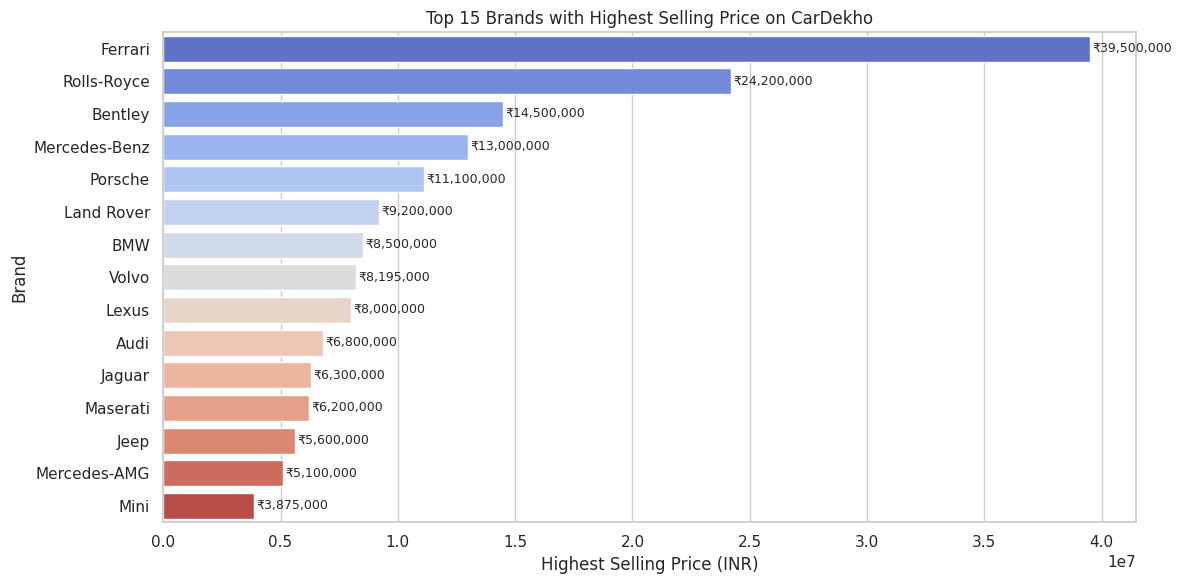

In [24]:
brand_max_price = df.groupby('brand')['selling_price'].max().sort_values(ascending=False)
top_15_brand_price = brand_max_price.head(15)
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x=top_15_brand_price.values,
    y=top_15_brand_price.index,
    hue=top_15_brand_price.index,
    palette="coolwarm"
)
plt.xlabel("Highest Selling Price (INR)")
plt.ylabel("Brand")
plt.title("Top 15 Brands with Highest Selling Price on CarDekho")


for i, price in enumerate(top_15_brand_price.values):
    ax.text(price + 100000, i, f'₹{price:,.0f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

BRANDS VS MILEAGE

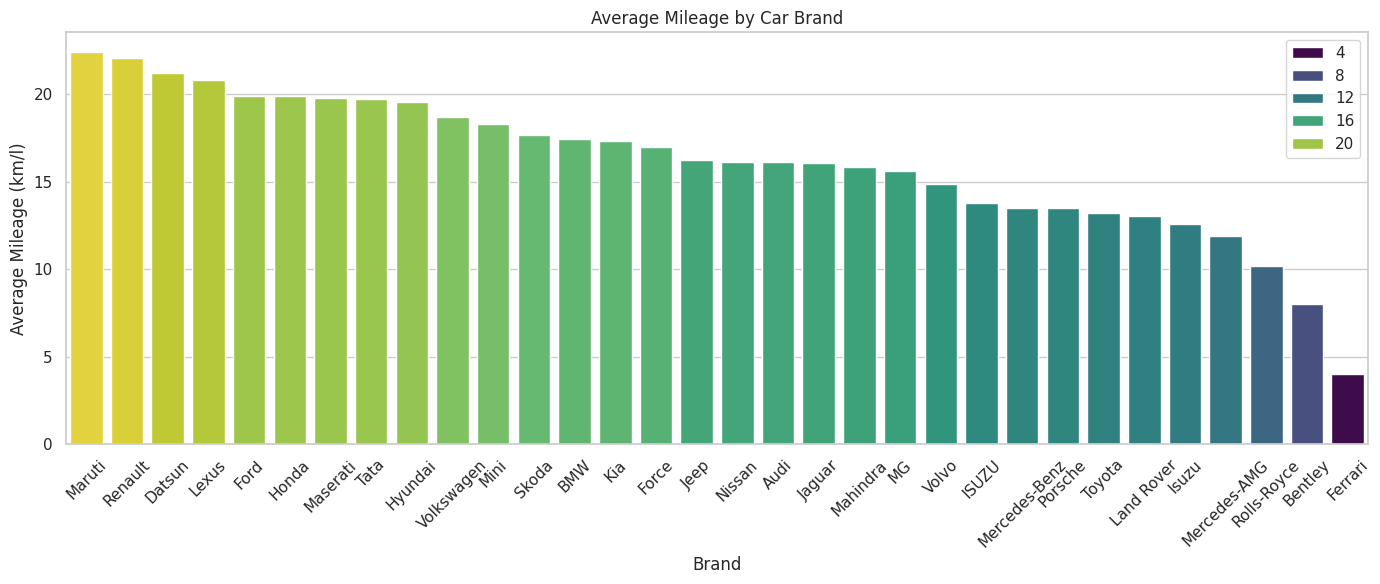

In [25]:
brand_avg_mileage = df.groupby('brand')['mileage'].mean().sort_values(ascending=False)


plt.figure(figsize=(14, 6))
ax = sns.barplot(x=brand_avg_mileage.index, y=brand_avg_mileage.values,hue=brand_avg_mileage.values, palette="viridis")


plt.xticks(rotation=45)
plt.ylabel("Average Mileage (km/l)")
plt.xlabel("Brand")
plt.title("Average Mileage by Car Brand")
plt.tight_layout()
plt.show()

MILEAGE VS SELLING PRICE

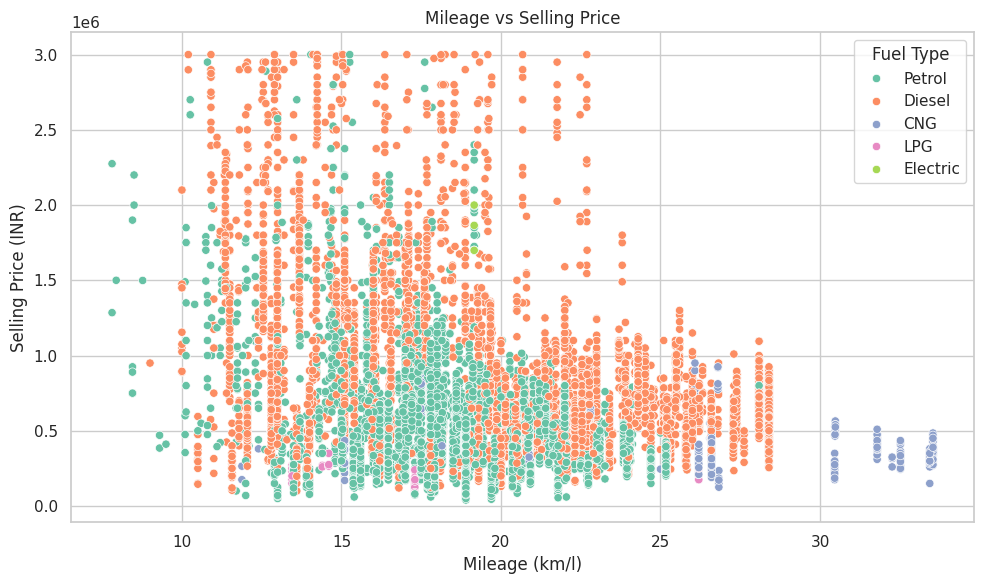

In [26]:
filtered_df = df[(df['selling_price'] <= 3000000) & (df['mileage'] <= 35)]


plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x='mileage', y='selling_price', hue='fuel_type', palette='Set2')

plt.title('Mileage vs Selling Price')
plt.xlabel('Mileage (km/l)')
plt.ylabel('Selling Price (INR)')
plt.legend(title='Fuel Type')
plt.grid(True)
plt.tight_layout()
plt.show()

TRANSMISSION TYPE VS COUNT

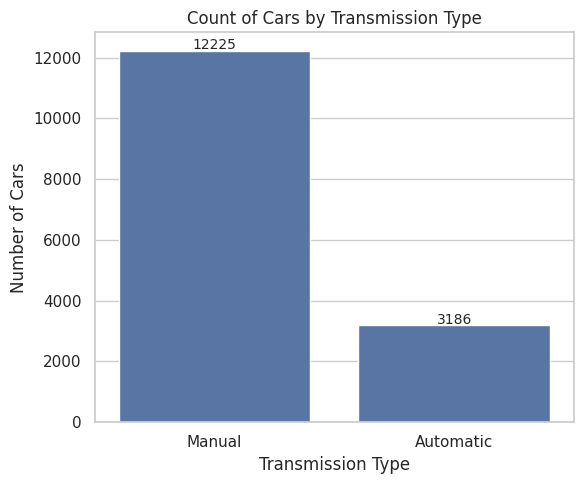

In [27]:
transmission_counts = df['transmission_type'].value_counts()


plt.figure(figsize=(6, 5))
sns.barplot(x=transmission_counts.index, y=transmission_counts.values )


for i, count in enumerate(transmission_counts.values):
    plt.text(i, count + 50, str(count), ha='center', fontsize=10)

plt.xlabel("Transmission Type")
plt.ylabel("Number of Cars")
plt.title("Count of Cars by Transmission Type")
plt.tight_layout()
plt.show()

TRANSMISSION TYPE VS PRICE

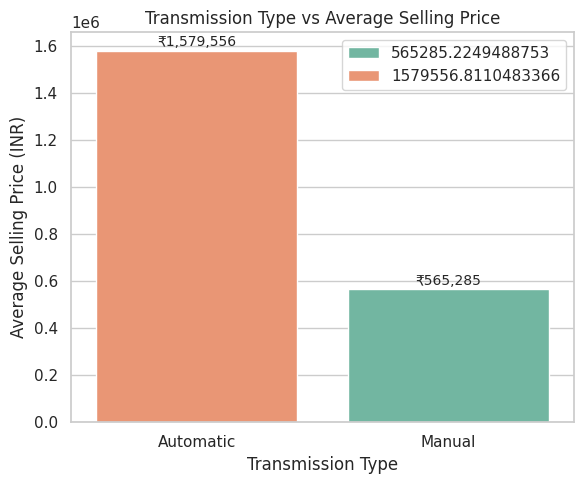

In [28]:
avg_price_by_transmission = df.groupby('transmission_type')['selling_price'].mean().sort_values(ascending=False)


plt.figure(figsize=(6, 5))
ax = sns.barplot(x=avg_price_by_transmission.index, y=avg_price_by_transmission.values, hue=avg_price_by_transmission.values,palette="Set2")

for i, price in enumerate(avg_price_by_transmission.values):
    ax.text(i, price + 20000, f"₹{int(price):,}", ha='center', fontsize=10)

plt.xlabel("Transmission Type")
plt.ylabel("Average Selling Price (INR)")
plt.title("Transmission Type vs Average Selling Price")
plt.tight_layout()
plt.show()

Removing Unecessary Columns

Dropping car_name ,brand and model\
These features are not directly correlated with the price of car and they can actually introduce noise into the model.

In [29]:
df.drop(columns=['car_name', 'brand', 'model'], inplace=True)
df

,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...
15406,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15409,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


ONE-HOT ENCODING FOR CATEGORICAL VALUES

In [30]:
df = pd.get_dummies(df, dtype=float, drop_first=True)
df

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Manual
0,9,120000,19.70,796,46.30,5,120000,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,5,20000,18.90,1197,82.00,5,550000,1.0,0.0,0.0,0.0,0.0,1.0,1.0
2,11,60000,17.00,1197,80.00,5,215000,1.0,0.0,0.0,0.0,0.0,1.0,1.0
3,9,37000,20.92,998,67.10,5,226000,1.0,0.0,0.0,0.0,0.0,1.0,1.0
4,6,30000,22.77,1498,98.59,5,570000,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,9,10723,19.81,1086,68.05,5,250000,0.0,0.0,0.0,0.0,0.0,1.0,1.0
15407,2,18000,17.50,1373,91.10,7,925000,0.0,0.0,0.0,0.0,0.0,1.0,1.0
15408,6,67000,21.14,1498,103.52,5,425000,0.0,0.0,1.0,0.0,0.0,0.0,1.0
15409,5,3800000,16.00,2179,140.00,7,1225000,0.0,0.0,1.0,0.0,0.0,0.0,1.0


Define X (features) and y (target)

In [31]:
X = df.drop('selling_price', axis=1)
y = df['selling_price']

SPLIT INTO TRAIN TEST SET

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

MODEL BUILDING AND COMPARISON

In [35]:
models = [LinearRegression, DecisionTreeRegressor, RandomForestRegressor]
model_names = ['LinearRegression', 'DecisionTree', 'RandomForest']

# Metrics storage
mse = []
rmse = []
r2 = []

# Evaluate each model
for model in models:
    reg = model()
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)

    mse_val = mean_squared_error(y_test, y_pred)
    mse.append(mse_val)
    rmse.append(np.sqrt(mse_val))
    r2.append(r2_score(y_test, y_pred))


for i in range(len(models)):
    print(f"Model: {model_names[i]}")
    print(f"  MSE  : {mse[i]:.2f}")
    print(f"  RMSE : {rmse[i]:.2f}")
    print(f"  R2   : {r2[i]:.4f}")
    print("-" * 50)



Model: LinearRegression
  MSE  : 252099533088.13
  RMSE : 502095.14
  R2   : 0.6651
--------------------------------------------------
Model: DecisionTree
  MSE  : 101667858373.18
  RMSE : 318853.98
  R2   : 0.8649
--------------------------------------------------
Model: RandomForest
  MSE  : 57406986546.95
  RMSE : 239597.55
  R2   : 0.9237
--------------------------------------------------


OBSERVATION\
1.Random Forest Regressor outperforms Linear and Decision Tree models with the highest R² score (0.9191) and the lowest RMSE (₹246,784), making it the most accurate and reliable for predicting car resale prices.\

2.Linear Regression performs the worst, likely due to its inability to capture complex, non-linear relationships in the data, while Decision Tree offers a decent middle ground but still falls short of Random Forest.


SAVING THE MODEL

In [36]:
import joblib

In [37]:
best_model_index = r2.index(max(r2))
best_model_class = models[best_model_index]
best_model_name = model_names[best_model_index]

best_model = best_model_class()
best_model.fit(X_train, y_train)

joblib.dump(best_model, f"{best_model_name}_best_model.joblib")

['RandomForest_best_model.joblib']

In [38]:
from google.colab import files
files.download("RandomForest_best_model.joblib")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>